# Pymaceuticals Inc.
---

### Analysis
- The bar graph shows number of mouse under Capomulin regimen were the highest (230) and Propriva had the lowest amount of mouse tested (161).
- The correlation between mouse weight and the average tumor volume is 0.84 which tells as the weight increase, chances of having tumor also increases.
- The regression analysis help detemine how true the corelation is between the total weight and the tumor volume. The r-squared value is 0.7088568047708723, which tells that roughly 70% of the data fits the model. Which further suggests that it would be good to draw analysis from this model for a larger population. 

 

In [381]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse= pd.merge(study_results, mouse_metadata, how="left", on= ["Mouse ID", "Mouse ID"])


# Display the data table for preview
combined_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [438]:
# Checking the number of mice.
number_mice = combined_mouse["Mouse ID"].nunique()
number_mice

249

In [439]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouce_id= combined_mouse.loc[combined_mouse.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique
duplicate_mouce_id

<bound method Series.unique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [440]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id= combined_mouse.loc[combined_mouse["Mouse ID"] == "g989", :]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [447]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_mouse[combined_mouse["Mouse ID"].isin(duplicate_mice_id) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [444]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_df= clean_df["Mouse ID"].nunique()
mice_in_clean_df

249

## Summary Statistics

In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
stdev = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem =  clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({
"Mean Tumor Volume": mean,
"Median Tumor Volume": median,
"Tumor Volume Variance": variance,
"Tumor Volume Std. Dev.": stdev,
"Tumor Volume Std. Err.":sem
})
summary_stat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [388]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [389]:
# obtaining data series from Drug Regimen column
mice_count= clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of Mice Per Treatment')

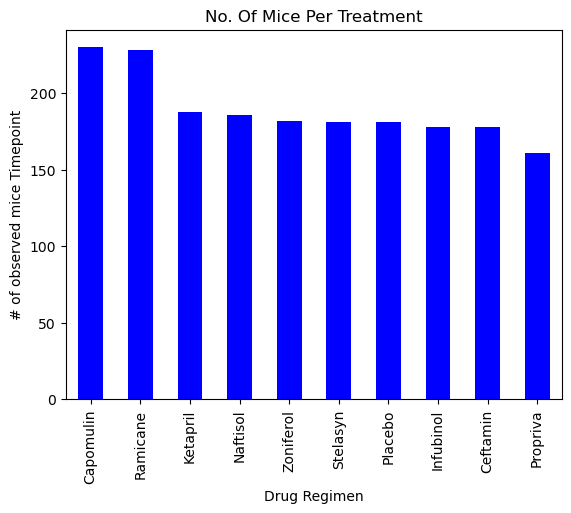

In [390]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot= mouse_count.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mice Timepoint")
plt.title("No. Of Mice Per Treatment")

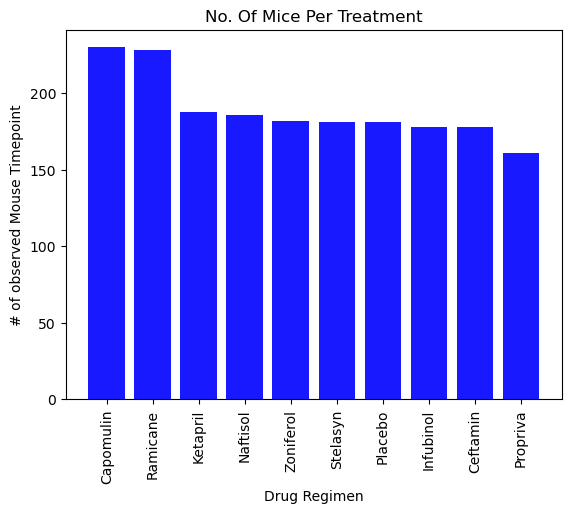

In [391]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis,y_axis, color="b", alpha=0.9, align="center")

#set labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoint")
plt.title("No. Of Mice Per Treatment")
plt.xticks(rotation="vertical")
plt.show()

In [392]:
# Obtaining Data
male_vs_female_data= clean_df["Sex"].value_counts()
male_vs_female_data

Sex
Male      958
Female    935
Name: count, dtype: int64

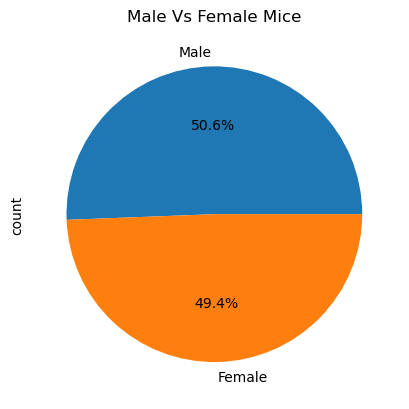

In [393]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female_data.plot.pie(autopct= "%1.1f%%")
plt.title("Male Vs Female Mice")
plt.show()

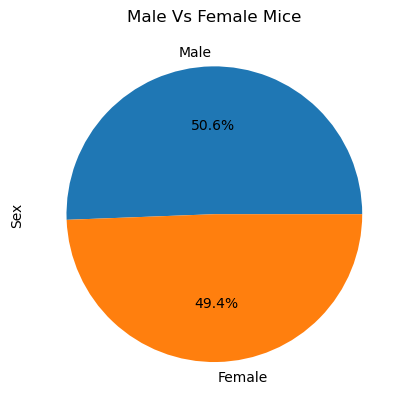

In [394]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", 'Male']
sizes = [49.4, 50.6]
plot = male_vs_female_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Male Vs Female Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [395]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_drug = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_drug = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_drug = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_drug = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]


In [396]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_drug.groupby("Mouse ID").max()['Timepoint']
Capomulin_df = pd.DataFrame(Capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_combined = pd.merge(Capomulin_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
Capomulin_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [397]:
Capomulin_tumors = Capomulin_combined["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile 

# Locate the rows which contain mice on each drug and get the tumor volumes
print(f" Lower quartile of Capomulin tumors is {lower_quartile}")
print(f" Upper quartile of Capomulin tumors is {upper_quartile}")
print(f" Interquartile Range of Capomulin tumors is {inter_quartile_range}")
print(f" Median of Capomulin tumors is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f" Values below {lower_bound} would be considered as outliers")
print(f" Values above {upper_bound} would be considered as outliers")

 Lower quartile of Capomulin tumors is 32.37735684
 Upper quartile of Capomulin tumors is 40.1592203
 Interquartile Range of Capomulin tumors is 7.781863460000004
 Median of Capomulin tumors is 38.1251644
 Values below 20.70456164999999 would be considered as outliers
 Values above 51.83201549 would be considered as outliers


In [398]:
# Start by getting the last (greatest) timepoint for each mouse
# Ramicane
Ramicane_last = Ramicane_drug.groupby("Mouse ID").max()['Timepoint']
Ramicane_df = pd.DataFrame(Ramicane_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_combined = pd.merge(Ramicane_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
Ramicane_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [399]:
Ramicane_tumors = Ramicane_combined["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane_tumors.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile 

# Locate the rows which contain mice on each drug and get the tumor volumes
print(f" Lower quartile of Capomulin tumors is {lower_quartile}")
print(f" Upper quartile of Capomulin tumors is {upper_quartile}")
print(f" Interquartile Range of Capomulin tumors is {inter_quartile_range}")
print(f" Median of Capomulin tumors is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f" Values below {lower_bound} would be considered as outliers")
print(f" Values above {upper_bound} would be considered as outliers")

 Lower quartile of Capomulin tumors is 31.56046955
 Upper quartile of Capomulin tumors is 40.65900627
 Interquartile Range of Capomulin tumors is 9.098536719999998
 Median of Capomulin tumors is 36.56165229
 Values below 17.912664470000003 would be considered as outliers
 Values above 54.30681135 would be considered as outliers


In [400]:
# Start by getting the last (greatest) timepoint for each mouse
# Infubinol
Infubinol_last = Infubinol_drug.groupby("Mouse ID").max()['Timepoint']
Infubinol_df = pd.DataFrame(Infubinol_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_combined = pd.merge(Infubinol_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
Infubinol_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [401]:
Infubinol_tumors = Infubinol_combined["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Infubinol_tumors.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile 

# Locate the rows which contain mice on each drug and get the tumor volumes
print(f" Lower quartile of Capomulin tumors is {lower_quartile}")
print(f" Upper quartile of Capomulin tumors is {upper_quartile}")
print(f" Interquartile Range of Capomulin tumors is {inter_quartile_range}")
print(f" Median of Capomulin tumors is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f" Values below {lower_bound} would be considered as outliers")
print(f" Values above {upper_bound} would be considered as outliers")

 Lower quartile of Capomulin tumors is 54.04860769
 Upper quartile of Capomulin tumors is 65.52574285
 Interquartile Range of Capomulin tumors is 11.477135160000003
 Median of Capomulin tumors is 60.16518046
 Values below 36.83290494999999 would be considered as outliers
 Values above 82.74144559000001 would be considered as outliers


In [402]:
# Start by getting the last (greatest) timepoint for each mouse
# Ceftamin
Ceftamin_last = Ceftamin_drug.groupby("Mouse ID").max()['Timepoint']
Ceftamin_df = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_combined = pd.merge(Ceftamin_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
Ceftamin_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [403]:
Ceftamin_tumors = Ramicane_combined["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ceftamin_tumors.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile 

# Locate the rows which contain mice on each drug and get the tumor volumes
print(f" Lower quartile of Capomulin tumors is {lower_quartile}")
print(f" Upper quartile of Capomulin tumors is {upper_quartile}")
print(f" Interquartile Range of Capomulin tumors is {inter_quartile_range}")
print(f" Median of Capomulin tumors is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f" Values below {lower_bound} would be considered as outliers")
print(f" Values above {upper_bound} would be considered as outliers")

 Lower quartile of Capomulin tumors is 31.56046955
 Upper quartile of Capomulin tumors is 40.65900627
 Interquartile Range of Capomulin tumors is 9.098536719999998
 Median of Capomulin tumors is 36.56165229
 Values below 17.912664470000003 would be considered as outliers
 Values above 54.30681135 would be considered as outliers


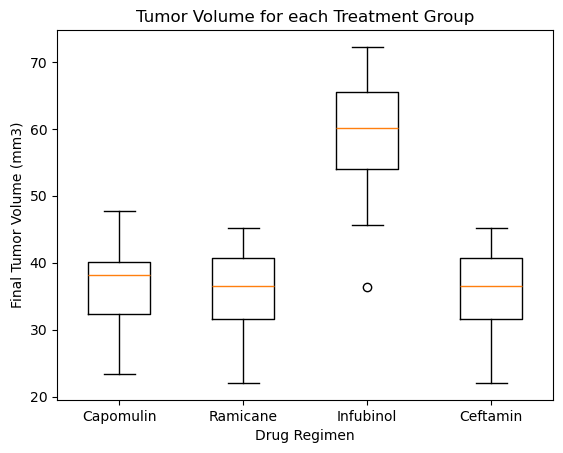

In [404]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Plot Data
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume for each Treatment Group")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(final_data, labels=regimen, widths=0.5, vert=True)    
plt.show()          


In [405]:
# Using for loop (and later for plot labels)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_mouse[combined_mouse["Drug Regimen"].isin(drug_list)]
drugs.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [406]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"])[("Tumor Volume (mm3)")].agg("last")
#Reshape dataframe
last_timepoint = last_timepoint.unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [407]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds

treatments = 0

for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([0.25,0.5,0.75]).round(2)
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile_range = round(upper_quartile - lower_quartile,2)
    lower_bound = round(lower_quartile - (1.5*inter_quartile_range),2)
    upper_bound = round(upper_quartile + (1.5*inter_quartile_range),2)
    
    if treatments == 0:
        print(f'--------------------------------------------------------------------------------')
        
    print(f'Statistics for {drug} regimen:')
    print(f'  Lower Quartile: {lower_quartile}')
    print(f'  Upper Quartile: {upper_quartile}')
    print(f'  Inter Quartile Range: {inter_quartile_range}')
    print(f'  Values below {lower_bound} would be considered as outliers')
    print(f'  Values above {upper_bound} would be considered as outliers')
    
    if treatments == len(drug_list) - 1:
        print(f'--------------------------------------------------------------------------------')
    
    treatments += 1

--------------------------------------------------------------------------------
Statistics for Capomulin regimen:
  Lower Quartile: 32.38
  Upper Quartile: 40.16
  Inter Quartile Range: 7.78
  Values below 20.71 would be considered as outliers
  Values above 51.83 would be considered as outliers
Statistics for Ramicane regimen:
  Lower Quartile: 31.56
  Upper Quartile: 40.66
  Inter Quartile Range: 9.1
  Values below 17.91 would be considered as outliers
  Values above 54.31 would be considered as outliers
Statistics for Infubinol regimen:
  Lower Quartile: 54.05
  Upper Quartile: 65.53
  Inter Quartile Range: 11.48
  Values below 36.83 would be considered as outliers
  Values above 82.75 would be considered as outliers
Statistics for Ceftamin regimen:
  Lower Quartile: 48.72
  Upper Quartile: 64.3
  Inter Quartile Range: 15.58
  Values below 25.35 would be considered as outliers
  Values above 87.67 would be considered as outliers
-----------------------------------------------------

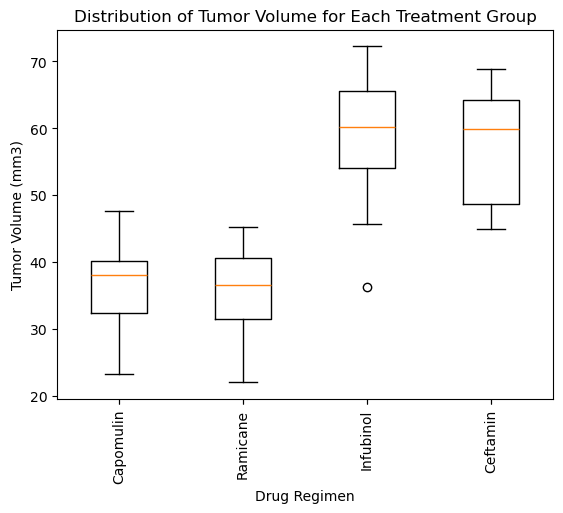

In [408]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list to store the data for each treatment group

data_for_boxplot = [last_timepoint[drug].dropna() for drug in drug_list]

# Create a boxplot
fig = plt.figure()
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4], drug_list, rotation= 90)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.boxplot(data_for_boxplot, labels=drug_list , sym='o')
plt.show()

## Line and Scatter Plots

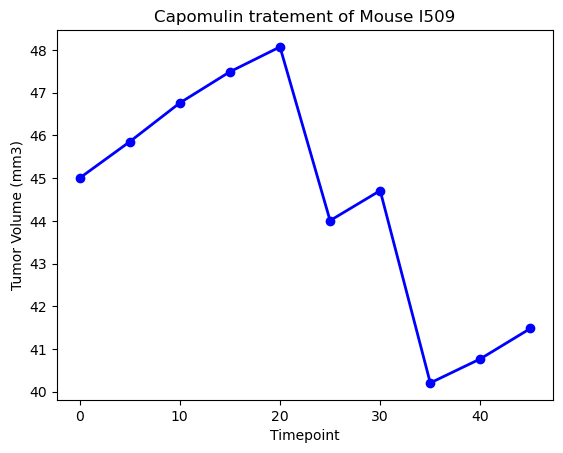

In [409]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'I509'
capomulin_data = Capomulin_drug.loc[Capomulin_drug["Mouse ID"] == 'l509',:]  
capomulin_data.head()

x_axis = capomulin_data["Timepoint"]
tumor_size = capomulin_data["Tumor Volume (mm3)"]

# Create a line plot

plt.plot(x_axis, tumor_size, linewidth=2, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin tratement of Mouse I509')

# Show the plot
plt.show()


In [410]:
Capomulin_drug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


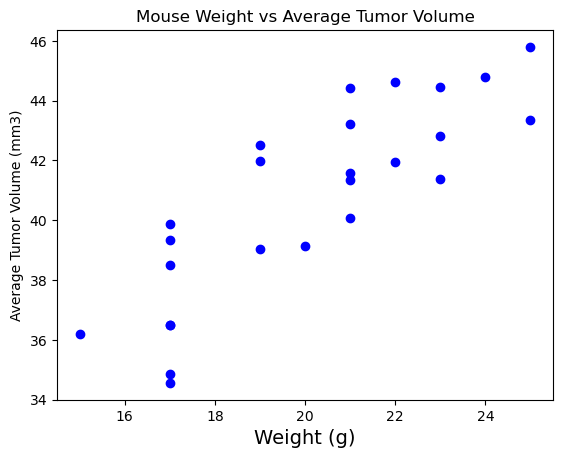

In [411]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Convert columns to numeric
Capomulin_drug.loc[:, "Weight (g)"] = pd.to_numeric(Capomulin_drug["Weight (g)"])
Capomulin_drug.loc[:, "Tumor Volume (mm3)"] = pd.to_numeric(Capomulin_drug["Tumor Volume (mm3)"])

# Calculate average values
average_capomulin = Capomulin_drug.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()


# Generate scatter plot
marker_size = 15
plt.scatter(average_capomulin["Weight (g)"], average_capomulin["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


In [415]:
average_capomulin.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


## Correlation and Regression

In [413]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation =  st.pearsonr(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


In [417]:
x_value = average_capomulin['Weight (g)']
y_value = average_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241048
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712605e-07)
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


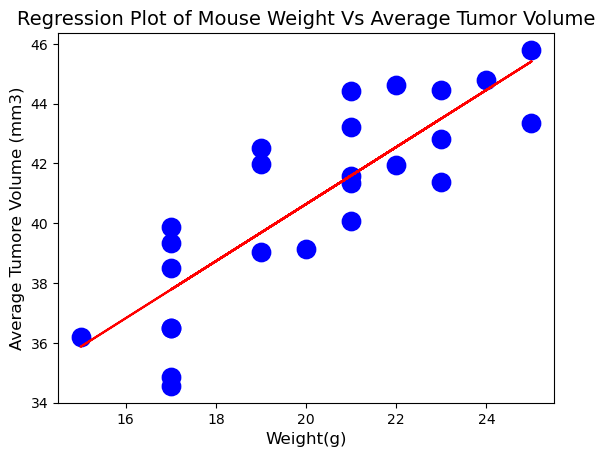

In [448]:
# Add the linear regression equation and line to plot

plt.subplots()
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Vs Average Tumor Volume',fontsize =14)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=12,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()